In [1]:
import pandas as pd

In [2]:
#Loading data
df = pd.read_csv('/kaggle/input/baldurs-gate-3-steam-reviews/BG3_reviews_updated.csv')

In [3]:
#looking to Data
df.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,written_during_early_access,comment_count,steam_purchase,received_for_free
0,153560814,english,This game hits all the right marks. 10/10,1702542971,1702542971,True,0,0,0.0,False,0,True,False
1,153560623,english,took me like 11 hours to understand the basics,1702542657,1702542657,True,0,0,0.0,False,0,True,False
2,153560414,english,10/10 game play and story! It's my first turn ...,1702542275,1702542275,True,0,0,0.0,False,0,True,False
3,153560343,english,gale is so baby girl,1702542158,1702542158,True,0,0,0.0,False,0,True,False
4,153559963,english,"YES,\n\nWITHOUT A F****N DOUBT.",1702541518,1702541518,True,0,0,0.0,False,0,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309103 entries, 0 to 309102
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   recommendationid             309103 non-null  int64  
 1   language                     309103 non-null  object 
 2   review                       308086 non-null  object 
 3   timestamp_created            309103 non-null  int64  
 4   timestamp_updated            309103 non-null  int64  
 5   voted_up                     309103 non-null  bool   
 6   votes_up                     309103 non-null  int64  
 7   votes_funny                  309103 non-null  int64  
 8   weighted_vote_score          309103 non-null  float64
 9   written_during_early_access  309103 non-null  bool   
 10  comment_count                309103 non-null  int64  
 11  steam_purchase               309103 non-null  bool   
 12  received_for_free            309103 non-null  bool   
dtyp

In [5]:
df.isnull().sum()


recommendationid                  0
language                          0
review                         1017
timestamp_created                 0
timestamp_updated                 0
voted_up                          0
votes_up                          0
votes_funny                       0
weighted_vote_score               0
written_during_early_access       0
comment_count                     0
steam_purchase                    0
received_for_free                 0
dtype: int64

In [6]:
# deleting Null values and resetting index
df = df.dropna()
df = df.reset_index(drop=True)

In [7]:
df.isnull().sum()

recommendationid               0
language                       0
review                         0
timestamp_created              0
timestamp_updated              0
voted_up                       0
votes_up                       0
votes_funny                    0
weighted_vote_score            0
written_during_early_access    0
comment_count                  0
steam_purchase                 0
received_for_free              0
dtype: int64

In [8]:
# Select a random subset of 10,000 rows
subset_df = df.sample(n=2000, random_state=42)

# Alternatively, you can select the first 10,000 rows
# subset_df = df.head(10000)

# Resetting index if needed
subset_df.reset_index(drop=True, inplace=True)

In [9]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   recommendationid             2000 non-null   int64  
 1   language                     2000 non-null   object 
 2   review                       2000 non-null   object 
 3   timestamp_created            2000 non-null   int64  
 4   timestamp_updated            2000 non-null   int64  
 5   voted_up                     2000 non-null   bool   
 6   votes_up                     2000 non-null   int64  
 7   votes_funny                  2000 non-null   int64  
 8   weighted_vote_score          2000 non-null   float64
 9   written_during_early_access  2000 non-null   bool   
 10  comment_count                2000 non-null   int64  
 11  steam_purchase               2000 non-null   bool   
 12  received_for_free            2000 non-null   bool   
dtypes: bool(4), float6

In [10]:
# text cleaning 
import re

def clean_text(text):
    # Convert to string
    text = str(text)
    # Remove special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    # Convert all characters to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

In [11]:
subset_df['review']

0       Sets a new level for CRPG genre. 9.5/10 for me...
1                                               100% GOTY
2                                       Highly recommend!
3       Act 1 of this game is an absolute masterpiece;...
4       Yes I can confirm that Baldur does indeed have...
                              ...                        
1995                                         Jogo do ano!
1996                                    best game of 2023
1997    This is one of the most difficult games to cov...
1998    Graphics are really good, but most importantly...
1999    Masterpiece.\n\n\nEdit 22/11/2023\n\nStill a M...
Name: review, Length: 2000, dtype: object

In [12]:
subset_df['votes_up'].unique().sum()

1341

In [13]:
x = subset_df['review'].apply(lambda x: clean_text(x))

In [14]:
x

0       sets a new level for crpg genre for me even th...
1                                                    goty
2                                        highly recommend
3       act of this game is an absolute masterpiece ch...
4       yes i can confirm that baldur does indeed have...
                              ...                        
1995                                          jogo do ano
1996                                         best game of
1997    this is one of the most difficult games to cov...
1998    graphics are really good but most importantly ...
1999                 masterpiece edit still a masterpiece
Name: review, Length: 2000, dtype: object

In [15]:
import numpy as np
y, label= pd.factorize(subset_df['votes_up'])

unique_values = np.unique(y)
num_unique_values = len(unique_values)

In [16]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# test_size=0.2 means that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# Import the Tokenizer class from Keras
from keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer()

# Build the vocabulary based on the training dataset
tokenizer.fit_on_texts(x_train)

# Tokenize the training and test datasets
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Vocabulary size (number of unique words) -> will be used in the embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [18]:
# Import the pad_sequences function from Keras
from keras.preprocessing.sequence import pad_sequences

# Find the maximum length of sequences in the training set
max_length = max(len(seq) for seq in x_train)

# Check for outliers in the test set and print any sequences that exceed the maximum length
for x in x_test:
    if len(x) > max_length:
        print(f"An outlier detected: {x}")

# Pad sequences to have a uniform length (max_length)
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

An outlier detected: [87, 4, 132, 6, 107, 62, 62, 62, 2310, 47, 25, 102, 76, 70, 41, 853, 10, 3, 236, 57, 38, 324, 15, 4, 59, 834, 9, 89, 62, 76, 4, 59, 206, 3, 11, 18, 304, 222, 2201, 29, 5, 70, 13, 14, 246, 20, 564, 518, 11, 1, 355, 132, 18, 24, 34, 499, 193, 10, 429, 4, 4324, 27, 4, 3275, 16, 8, 38, 4, 7, 2832, 757, 14, 17, 30, 769, 87, 5, 109, 10, 4, 313, 59, 93, 1216, 9, 1, 330, 474, 248, 14, 73, 3354, 600, 11, 224, 7, 51, 3918, 777, 1702, 113, 1702, 5, 1352, 981, 24, 69, 11, 262, 754, 413, 5, 215, 5282, 7, 4836, 5, 1140, 4836, 215, 7, 16, 111, 1140, 1859, 741, 1845, 7, 4, 763, 5, 481, 673, 2, 542, 3428, 8, 11, 99, 5130, 600, 21, 76, 2, 1084, 89, 168, 63, 21, 64, 5260, 11, 1, 3, 14, 44, 1, 181, 777, 14, 12, 32, 11, 4, 474, 16, 89, 18, 3654, 532, 14, 48, 8, 644, 104, 30, 7, 95, 2, 14, 1643, 2143, 656, 213, 27, 1, 200, 1767, 14, 97, 5, 611, 185, 165, 20, 96, 600, 5220, 1444, 320, 126, 777, 2, 120, 3229, 217, 12, 1009, 74, 102, 5, 3428, 8, 106, 600, 12, 32, 138, 11, 2, 5133, 47, 95, 

In [19]:
# Import the to_categorical function from Keras utils
from keras.utils import to_categorical

# Convert the categorical labels to one-hot encoded format for both training and testing sets
# 'num_classes=num_unique_values' indicates the number of classes in the classification task
y_test = to_categorical(y_test, num_classes=num_unique_values)
y_train = to_categorical(y_train, num_classes=num_unique_values)

In [20]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


# Simple recall function
def recall(y_true, y_pred):
    true_pos = K.sum(K.round(y_true * y_pred))
    pos_labels = K.sum(K.round(y_true))
    recall = true_pos / (pos_labels + K.epsilon())
    return recall

# Simple precision function
def precision(y_true, y_pred):
    true_pos = K.sum(K.round(y_true * y_pred))
    pred_pos = K.sum(K.round(y_pred))
    precision = true_pos / (pred_pos + K.epsilon())
    return precision

# Simple F1 score function using the above functions
def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2 * (precisions * recalls) / (precisions + recalls + K.epsilon())

# Define output dimension
output_dim = 3

# Create LSTM model architecture (CNN + LSTM)
model = Sequential([
    Embedding(vocab_size, output_dim, input_length=max_length),
    LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(num_unique_values, activation="softmax"),
])

# Compile the model with specified metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1, precision, recall])

# checking the model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1214, 3)           16539     
                                                                 
 lstm (LSTM)                 (None, 32)                4608      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 19)                1235      
                                                                 
Total params: 24494 (95.68 KB)
Trainable params: 24494 (

In [21]:
# Train the model
model_history = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
50/50 [==============================] - 113s 2s/step - loss: 1.9097 - accuracy: 0.7119 - f1: 0.3293 - precision: 0.3886 - recall: 0.3056 - val_loss: 0.9467 - val_accuracy: 0.7250 - val_f1: 0.7236 - val_precision: 0.7236 - val_recall: 0.7236
Epoch 2/10
50/50 [==============================] - 106s 2s/step - loss: 1.0640 - accuracy: 0.7156 - f1: 0.6642 - precision: 0.7258 - recall: 0.6137 - val_loss: 0.8911 - val_accuracy: 0.7250 - val_f1: 0.7236 - val_precision: 0.7236 - val_recall: 0.7236
Epoch 3/10
50/50 [==============================] - 106s 2s/step - loss: 1.0109 - accuracy: 0.7325 - f1: 0.6947 - precision: 0.7405 - recall: 0.6556 - val_loss: 0.8801 - val_accuracy: 0.7250 - val_f1: 0.7236 - val_precision: 0.7236 - val_recall: 0.7236
Epoch 4/10
50/50 [==============================] - 107s 2s/step - loss: 0.9716 - accuracy: 0.7362 - f1: 0.7036 - precision: 0.7432 - recall: 0.6694 - val_loss: 0.8817 - val_accuracy: 0.7250 - val_f1: 0.7236 - val_precision: 0.7236 - val_rec

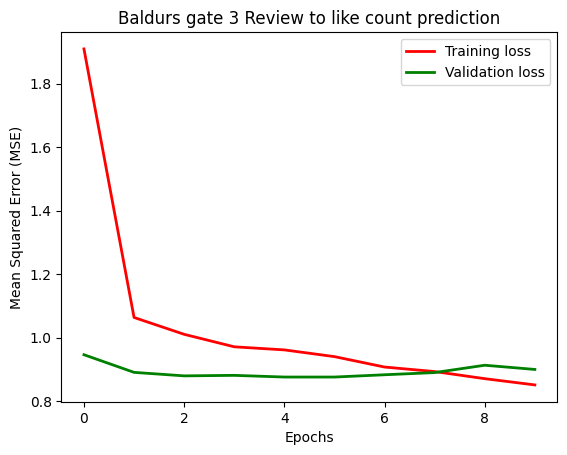

In [22]:
import matplotlib.pyplot as plt

# Access the training history of the model
hist = model.history.history

# Plot training loss in red and validation loss in green
plt.plot(hist['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g', linewidth=2, label='Validation loss')

# Set plot title and labels
plt.title('Baldurs gate 3 Review to like count prediction')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [23]:
# Assume user_input is a string provided by the user
user_input = "Your text here"

# Preprocess the user input
# ... (perform the same preprocessing as we did for the training data)
input_sequence = tokenizer.texts_to_sequences([user_input])
padded_input = pad_sequences(input_sequence, maxlen=max_length)
# Make predictions
predictions = model.predict(padded_input)

# Interpret the results (assuming a classification problem)
predicted_class = np.argmax(predictions)# Print or use the predicted class

print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 1s 586ms/step
Predicted class: 0
